#Machine Learning Zoomcamp Cohort 2023 - Capstone Project


---


##Predicting High School Math Scores

This notebook is an integral part of the Capstone Project for the Machine Learning Zoomcamp Cohort 2023. The focus of this endeavor is to predict math scores based on a dataset obtained from Kaggle, specifically this link - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams. The dataset encapsulates information about students' performance in various subjects during their high school examinations, with a specific emphasis on predicting math scores.



## Dataset Description:

The dataset provides a rich array of information on students' performance during high school examinations. The key features include:

- **Gender:** The gender of the student (categorical: 'male' or 'female').
- **Race/Ethnicity:** The ethnic background or race of the student (categorical: 'group A', 'group B', 'group C', 'group D', 'group E').
- **Parental Level of Education:** The highest education level attained by the student's parents (categorical: 'some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree').
- **Lunch:** The type of lunch the student receives (categorical: 'standard' or 'free/reduced').
- **Test Preparation Course:** Whether the student completed a test preparation course (categorical: 'none' or 'completed').
- **Math Score:** The score achieved by the student in the math section of the examination (numeric).
- **Reading Score:** The score achieved by the student in the reading section of the examination (numeric).
- **Writing Score:** The score achieved by the student in the writing section of the examination (numeric).

This dataset captures a diverse set of attributes that could influence a student's math performance. It includes demographic information, details about the student's preparation for the exam, and scores from related subjects. The goal is to leverage this information to build a predictive model for math scores, providing insights into the factors affecting students' academic achievements.

The models employed for prediction include:

*   Linear Regression
*   Lasso
*   Ridge
*   K-Neighbors Regressor
*   Decision Tree Regressor
*   Random Forest Regressor
*   XGBRegressor
*   CatBoosting Regressor
*   AdaBoost Regressor

For model evaluation, metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared were utilized. The comprehensive workflow of data preparation, exploratory data analysis (EDA), and the model selection process is documented in this notebook.

## Notebook Content:

1. **Importing:** Loading necessary libraries and modules.
2. **Data Preparation and Cleaning:**
   - Removing space and adding underscores
   - chwck missing valuue.
   - Check duplicate.

3. **Exploratory Data Analysis (EDA):**
   - Inspecting data information.
   - Information about catagorical and numeric data
   - Adding columns for "Total Score" and "Average" for additional analysis
4. **Visualization of Data distribution**
  - Histogram
  - Multivariate analysis using pieplot
  - Feature wise visualization
5. **Preprocessing:**
   - Preprocessing
   - Add pickle file
   - Splitting the dataset into train, val and test parts
6. **Model Training:**
   - Evalution
   - Selecting Best model
   - Train the final model
   - Add pickle file
7. **Predicting New Values:**
   - Applying the final model to predict new math scores.


#Importing the packages

Loading necessary libraries and modules.

In [48]:
!pip install catboost

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore');

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split


# Data Preparation and Cleaning

In [49]:
FILE_LOCATION = '/home/snl/Documents/Projects/mlzoomcamp_capstone/StudentsPerformance.csv'
#FILE_LOCATION = '/content/StudentsPerformance.csv'

df = pd.read_csv(FILE_LOCATION)


In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
df.shape

(1000, 8)

In [52]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [53]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

###Removing space and adding underscores


In [54]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')



In [55]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

###check missing value

In [56]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing value

###Check duplicate

In [57]:
df.duplicated().sum()


0

No duplicate value

#Exploratory Data Analysis (EDA)

###Inspecting data information

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


This data provides insights into the scores of a group of people in three subjects: math, reading, and writing. Here's what the information means:

1. **Count:** There are 1000 people in the group.
2. **Mean:** On average, the math score is 66.089, reading score is 69.169, and writing score is 68.054.
3. **Standard Deviation (std):** The scores vary around the mean by approximately 15 points for math, 14.6 points for reading, and 15.2 points for writing.
4. **Minimum (min):** The lowest scores recorded are 0.0 for math, 17.0 for reading, and 10.0 for writing.
5. **25%, 50%, 75% (Percentiles):**
   - 25% of people scored 57.0 or lower in math, 59.0 or lower in reading, and 57.75 or lower in writing.
   - 50% of people scored 66.0 or lower in math, 70.0 or lower in reading, and 69.0 or lower in writing.
   - 75% of people scored 77.0 or lower in math, 79.0 or lower in reading, and 79.0 or lower in writing.
6. **Maximum (max):** The highest scores recorded are 100.0 for math, 100.0 for reading, and 100.0 for writing.

In summary, this data provides a snapshot of the distribution of scores, showing the average, variability, and the range of scores in the three subjects.

### Information about catagorical and numeric data


In [60]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,master's_degree,standard,none,90,95,93
3,male,group_a,associate's_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75


In [61]:
df.columns.tolist()


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [62]:
columns_of_categories = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for column in columns_of_categories:
    print(f"Categories in '{column}' variable:", end=" ")
    print(df[column].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group_b' 'group_c' 'group_a' 'group_d' 'group_e']
Categories in 'parental_level_of_education' variable: ["bachelor's_degree" 'some_college' "master's_degree" "associate's_degree"
 'high_school' 'some_high_school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [63]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

# Print columns
print(f"We have {len(numeric_features)} numerical features: {list(numeric_features)}")
print(f"We have {len(categorical_features)} categorical features: {list(categorical_features)}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [64]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,master's_degree,standard,none,90,95,93
3,male,group_a,associate's_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75



### Adding columns for "Total Score" and "Average"


In [65]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_b,bachelor's_degree,standard,none,72,72,74,218,72.666667
1,female,group_c,some_college,standard,completed,69,90,88,247,82.333333
2,female,group_b,master's_degree,standard,none,90,95,93,278,92.666667
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,148,49.333333
4,male,group_c,some_college,standard,none,76,78,75,229,76.333333


In [66]:
print(f"Number of students with full marks in Maths: {df[df['math_score'] == 100]['average'].count()}")
print(f"Number of students with full marks in Writing: {df[df['writing_score'] == 100]['average'].count()}")
print(f"Number of students with full marks in Reading: {df[df['reading_score'] == 100]['average'].count()}")


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [67]:
print(f"Number of students with less than 20 marks in Maths: {df[df['math_score'] <= 20]['average'].count()}")
print(f"Number of students with less than 20 marks in Writing: {df[df['writing_score'] <= 20]['average'].count()}")
print(f"Number of students with less than 20 marks in Reading: {df[df['reading_score'] <= 20]['average'].count()}")


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights:**

1. **Strengths:**
   - Mathematics: 7 students achieved full marks, showcasing strong proficiency.
   - Writing: 14 students scored perfectly, indicating a commendable performance.
   - Reading: 17 students attained full marks, highlighting excellence in comprehension.

2. **Areas for Improvement:**
   - Mathematics: 4 students scored less than 20, indicating a need for focus and improvement.
   - Writing: 3 students scored less than 20, suggesting room for enhancement.
   - Reading: Only 1 student scored less than 20, showcasing a relatively strong performance overall.

#Visualization of Data distribution



###histogram
Karnel Distribution Function (KDE)


1. Average Scores Distribution by Gender:

Visualizing the distribution of average scores with a histogram. The left plot shows the overall distribution, while the right plot distinguishes by gender.

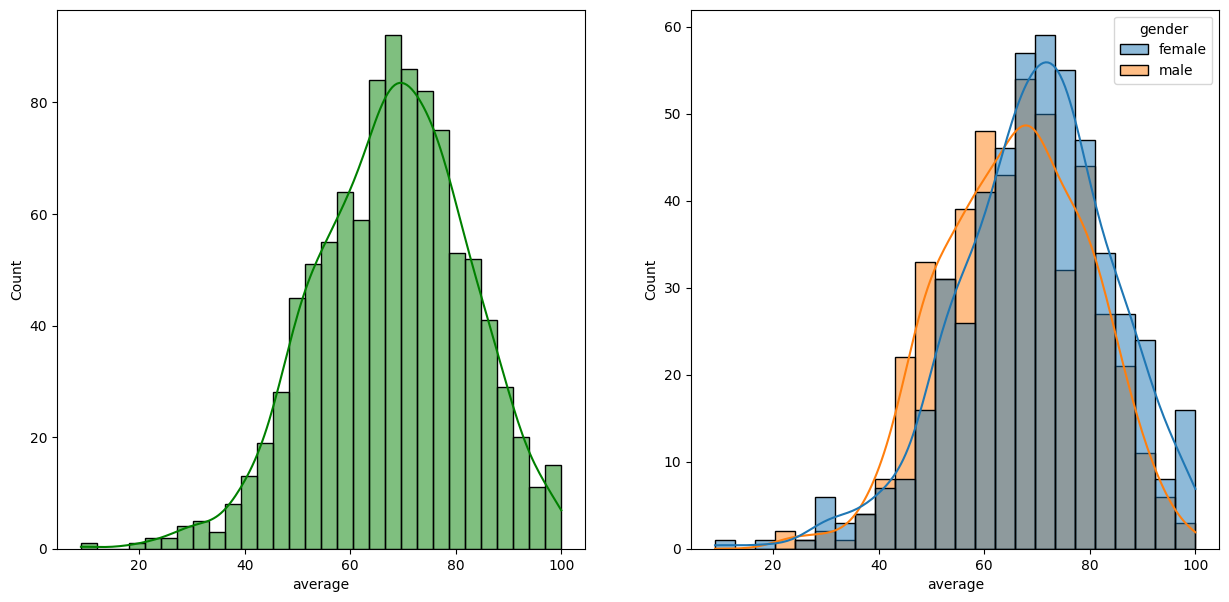

In [68]:
# Histograms of Average Scores

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Left subplot: Overall distribution
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

# Right subplot: Distribution with gender differentiation
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

2. Total Scores Distribution by Gender:

Examining the distribution of total scores through a histogram. The left plot provides an overall perspective, while the right plot differentiates by gender.

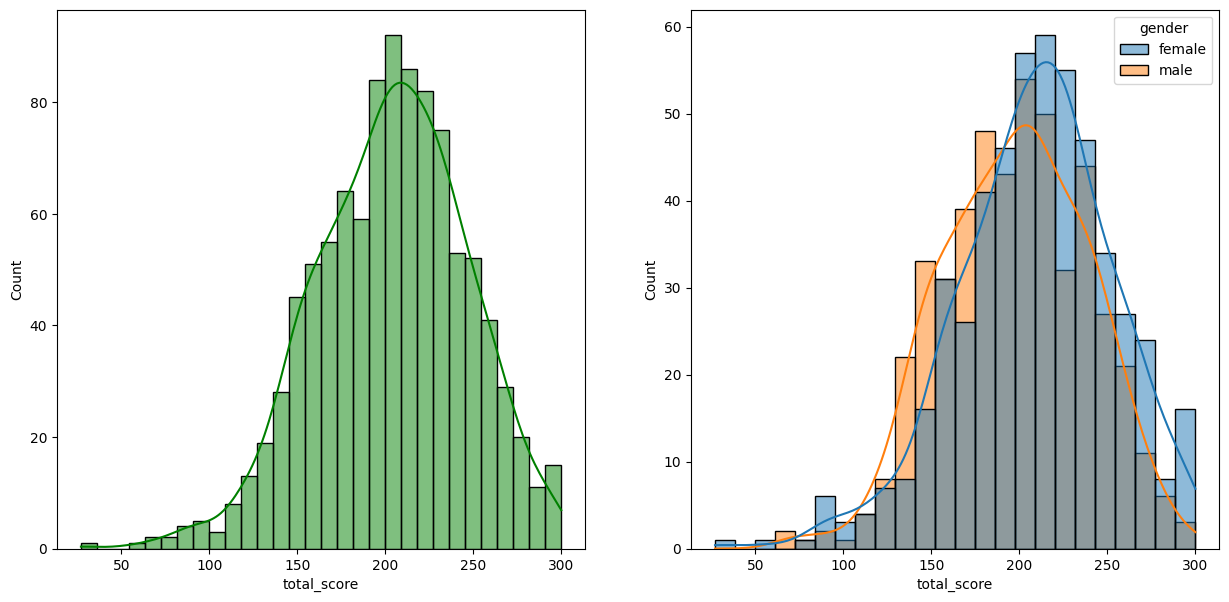

In [69]:
# Histograms of Total Scores

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Left subplot: Overall distribution
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')

# Right subplot: Distribution with gender differentiation
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

3. Average Scores Distribution by Lunch Type:

Exploring the distribution of average scores with histograms, segmented by lunch type. The three plots depict the overall distribution, female students, and male students.

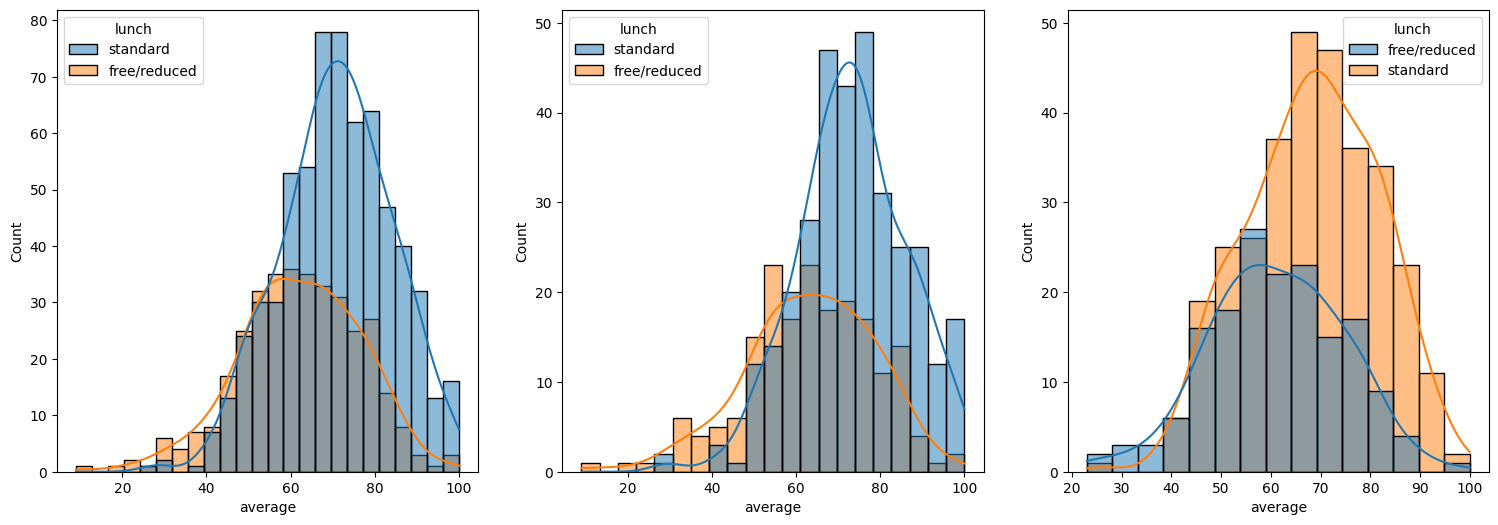

In [70]:
# Average Scores Distribution by Lunch and Gender

plt.subplots(1,3,figsize=(25,6))

# Left subplot: Overall distribution
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

# Middle subplot: Female students' distribution
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

# Right subplot: Male students' distribution
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()



4. Average Scores Distribution by Parental Education:

Analyzing the distribution of average scores with histograms, categorized by parental level of education. The plots illustrate the overall distribution, male students, and female students.

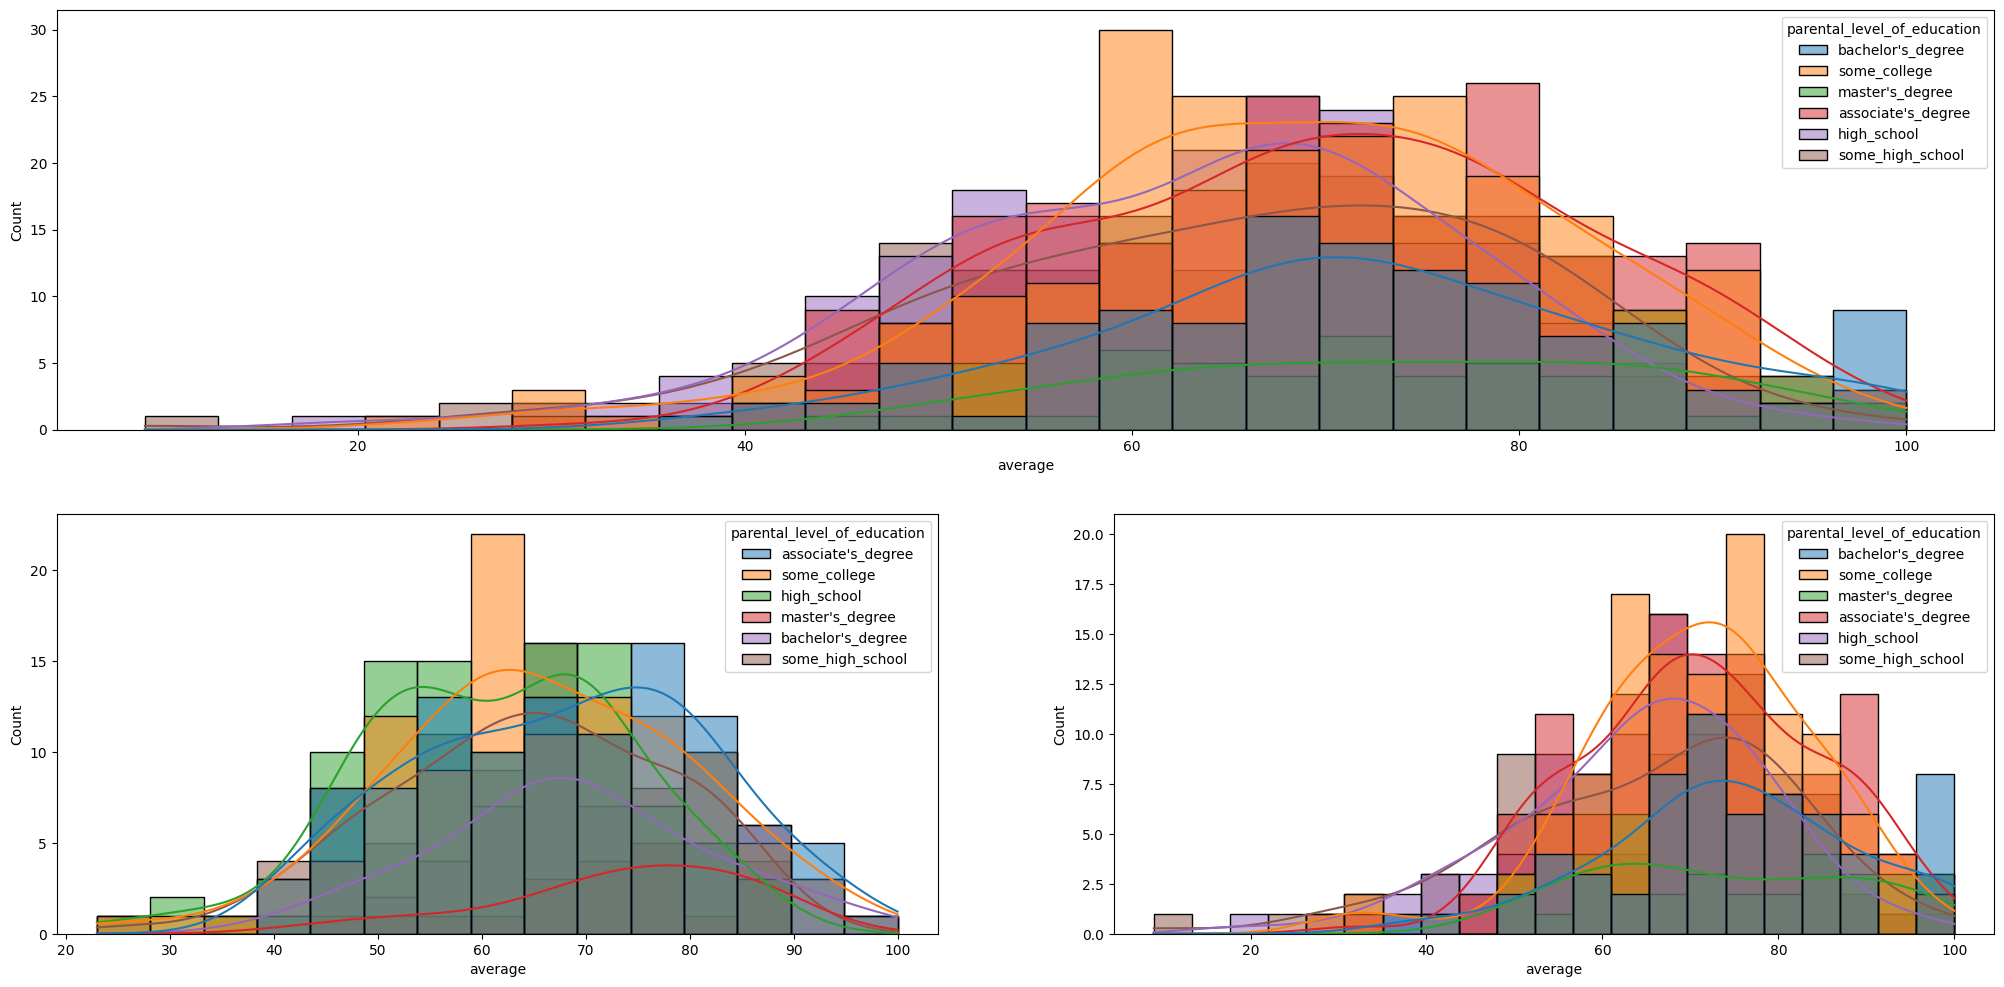

In [71]:
# Average Scores Distribution by Parental Education and Gender
plt.subplots(2, 2, figsize=(25, 12))

# First subplot: Overall distribution
plt.subplot(211)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

# Second subplot: Male students' distribution
plt.subplot(223)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

# Third subplot: Female students' distribution
plt.subplot(224)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

5. Average Scores Distribution by Race/Ethnicity:

Examining the distribution of average scores using histograms, segmented by race/ethnicity. The three plots represent the overall distribution, female students, and male students.

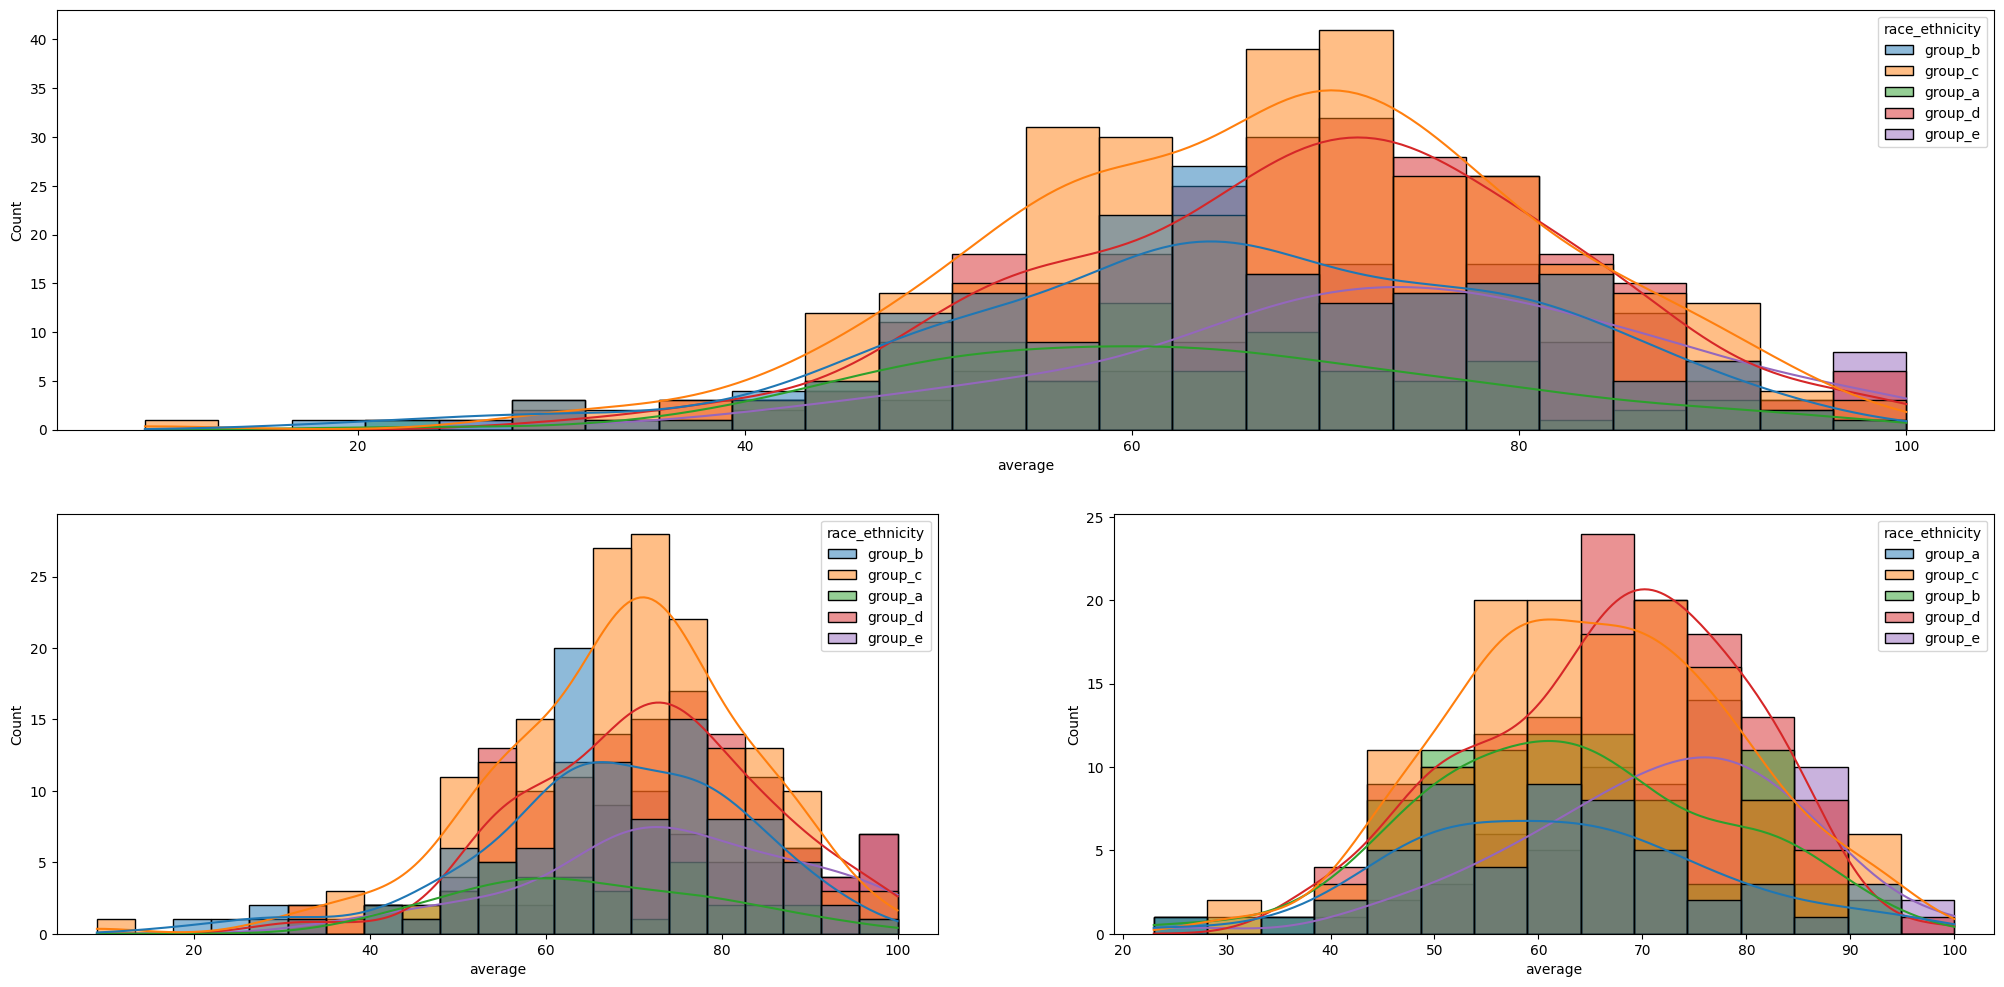

In [72]:
# Average Scores Distribution by Race/Ethnicity and Gender
plt.subplots(2, 2, figsize=(25, 12))

# First subplot: Overall distribution
plt.subplot(211)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

# Second subplot: Female students' distribution
plt.subplot(223)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')

# Third subplot: Male students' distribution
plt.subplot(224)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

### Multivariate analysis using pieplot


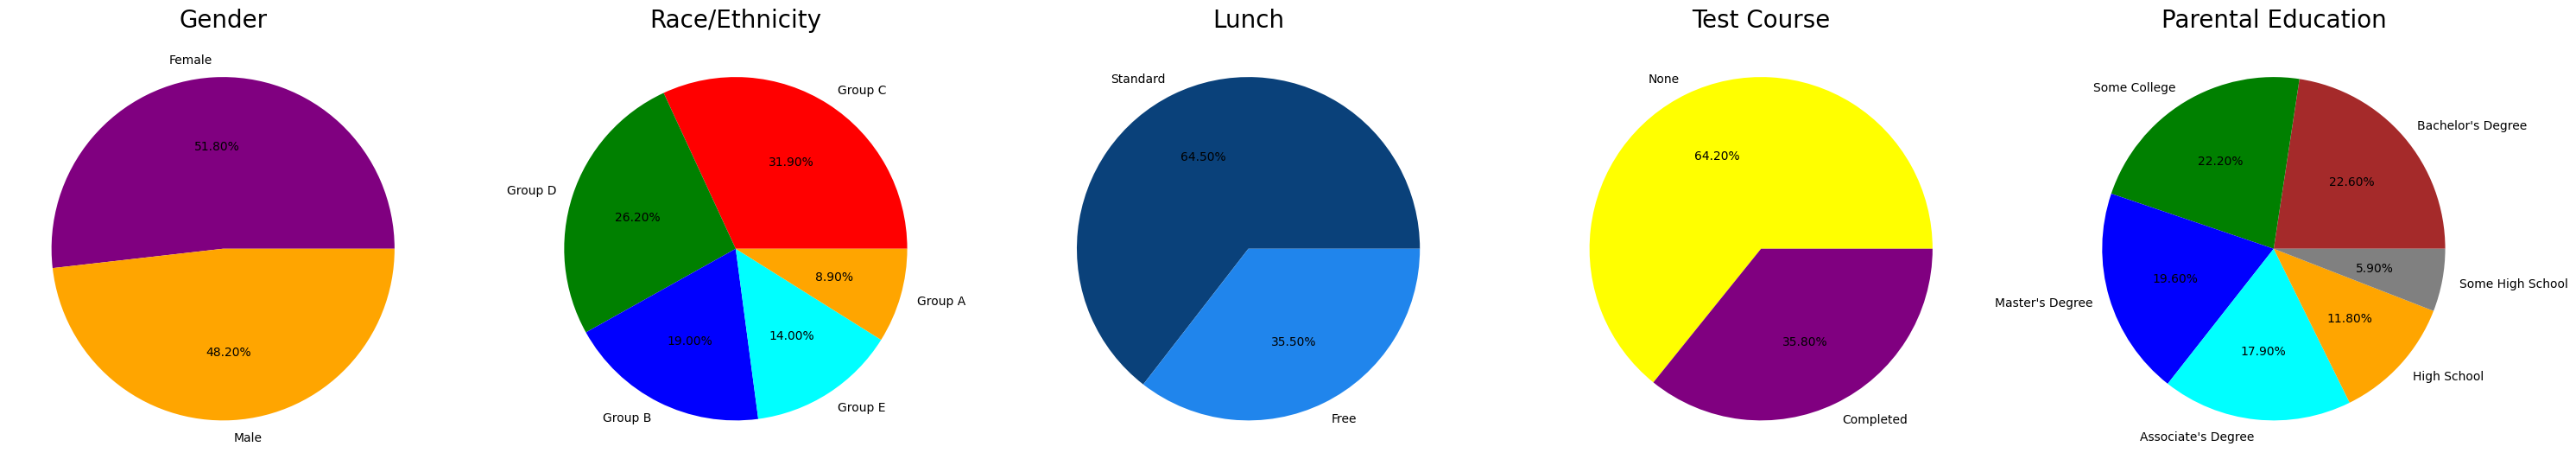

In [73]:

plt.rcParams['figure.figsize'] = (30, 12)

# Define a function to create pie charts
def create_pie_chart(ax, data, labels, title, colors):
    size = data.value_counts()
    ax.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
    ax.set_title(title, fontsize=20)
    ax.axis('off')

# Create subplots
fig, axs = plt.subplots(1, 5)

# Gender Pie Chart
create_pie_chart(axs[0], df['gender'], ['Female', 'Male'], 'Gender', ['purple', 'orange'])

# Race/Ethnicity Pie Chart
create_pie_chart(axs[1], df['race_ethnicity'], ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'],
                 'Race/Ethnicity', ['red', 'green', 'blue', 'cyan', 'orange'])

# Lunch Pie Chart
create_pie_chart(axs[2], df['lunch'], ['Standard', 'Free'], 'Lunch', ['#0a417a', '#2085ec'])

# Test Preparation Course Pie Chart
create_pie_chart(axs[3], df['test_preparation_course'], ['None', 'Completed'], 'Test Course', ['yellow', 'purple'])

# Parental Education Pie Chart
parental_labels = ["Bachelor's Degree", 'Some College', "Master's Degree", "Associate's Degree", 'High School', 'Some High School']
create_pie_chart(axs[4], df['parental_level_of_education'], parental_labels, 'Parental Education',
                 ['brown', 'green', 'blue', 'cyan', 'orange', 'grey'])

plt.tight_layout()
plt.show()


*Insights*
The count of male and female students is nearly equal.
The highest number of students belongs to Group C.
A greater number of students have standard lunch.
A higher number of students haven't enrolled in any test preparation course.
The highest parental education level is "Some College," followed closely by "Associate's Degree."

###Feature wise Visualization

Outliers

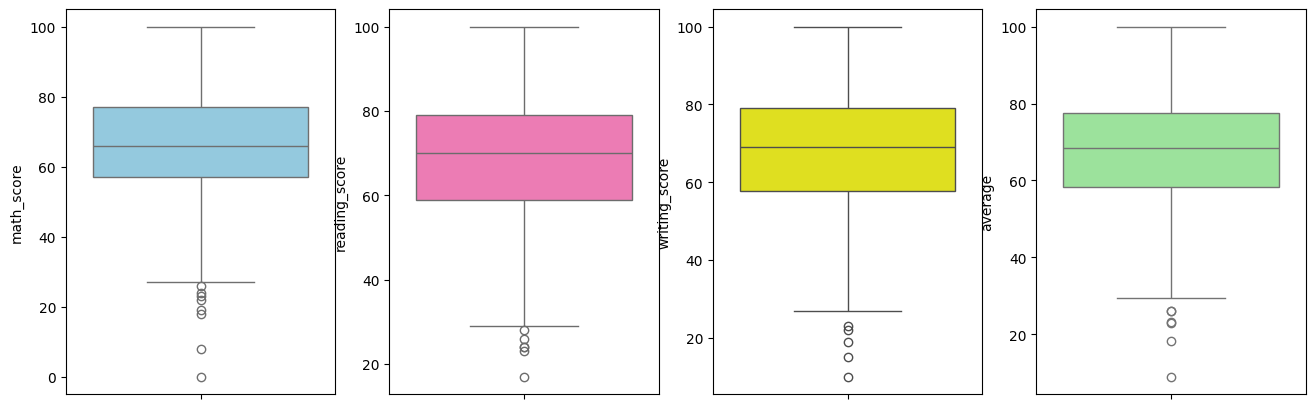

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

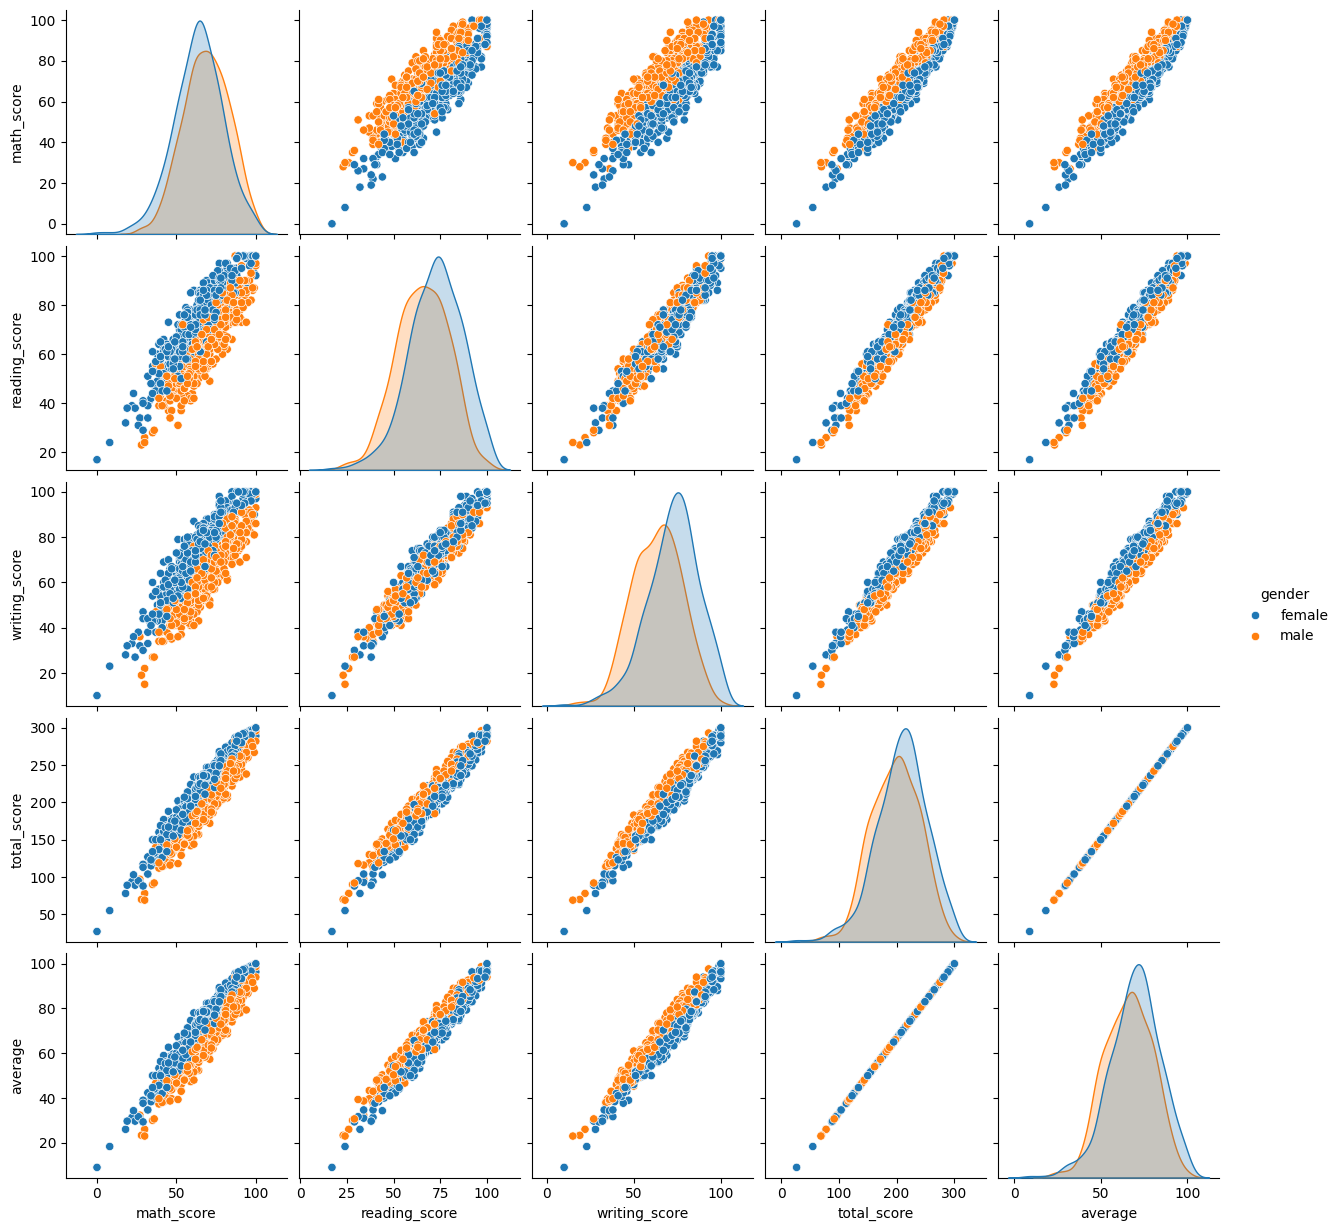

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()

The plot above shows pairs of variables in our dataset, with different colors representing different genders. What's noticeable is that all the scores—math, reading, and writing—tend to increase together in a straight line. In simpler terms, as one score goes up, the others also tend to go up. This suggests a positive correlation or trend between the scores, indicating that students who perform well in one subject also tend to perform well in the others.

#Preprocessing

In [76]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_b,bachelor's_degree,standard,none,72,72,74,218,72.666667
1,female,group_c,some_college,standard,completed,69,90,88,247,82.333333
2,female,group_b,master's_degree,standard,none,90,95,93,278,92.666667
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,148,49.333333
4,male,group_c,some_college,standard,none,76,78,75,229,76.333333


In [77]:
X = df.drop(columns=['math_score', 'total_score', 'average'],axis=1)
X.head(), X.shape

(   gender race_ethnicity parental_level_of_education         lunch  \
 0  female        group_b           bachelor's_degree      standard   
 1  female        group_c                some_college      standard   
 2  female        group_b             master's_degree      standard   
 3    male        group_a          associate's_degree  free/reduced   
 4    male        group_c                some_college      standard   
 
   test_preparation_course  reading_score  writing_score  
 0                    none             72             74  
 1               completed             90             88  
 2                    none             95             93  
 3                    none             57             44  
 4                    none             78             75  ,
 (1000, 7))

In [78]:
y = df['math_score']


In [79]:
y.shape

(1000,)

### Preprocessing

In [80]:


# Separate features based on data types
numeric_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features),
    ]
)


In [81]:
X = preprocessor.fit_transform(X)



###Add pickle file

In [82]:
import pickle
import joblib

with open('preprocessor.pkl', 'wb') as file:
    joblib.dump((preprocessor, oh_transformer, numeric_transformer), file)

In [83]:
X.shape

(1000, 19)

###Splitting the dataset into train, val and test parts


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#Model training

Function to calculate between Actual and Predicted Values


In [85]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

###Evalution

In [86]:

# Dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and R2 scores
model_list = []
r2_list = []

# Loop through each model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Display model performance metrics
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-----------------------

XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4733
- Mean Absolute Error: 5.0577
- R2 Score: 0.8278


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
- R2 Score: 0.9589
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0086
- Mean Absolute Error: 4.6125
- R2 Score: 0.8516


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9612
- Mean Absolute Error: 4.8468
- R2 Score: 0.8424
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1928
- Mean Absolute Error: 4.7710
- R2 Score: 0.8424




### Selecting the best model


In [87]:
# Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849266
8,AdaBoost Regressor,0.842397
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.738122


The table presents the performance of different machine learning models in predicting high school math scores. The R-squared score, which indicates how well each model explains the variance in the data, is used for evaluation.

- **Ridge and Linear Regression** models exhibit the highest R-squared scores, suggesting they are the most effective in capturing the relationships within the data.
- **AdaBoost Regressor and CatBoosting Regressor** also perform impressively well, showcasing their robust predictive capabilities.
- **Random Forest Regressor** closely follows, demonstrating its effectiveness in this context.
- **XGBRegressor, Lasso, K-Neighbors Regressor, and Decision Tree** models, while still providing reasonable predictions, show slightly lower R-squared scores compared to the top-performing models.

In simpler terms, models like Ridge and Linear Regression seem to better understand and predict the math scores based on the given features, as indicated by their higher R-squared scores.


We are using the Ridge Regression model and will utilize it for further analysis, deployment, and any future improvements to enhance its predictive accuracy.

###Train the final model

In [88]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

new_data = X_train[1]


y_pred = ridge_model.predict([new_data])

print("\nPredicted Math Score:")
print(y_pred)


Predicted Math Score:
[67.4941151]


In [89]:
y_train.head()

29     62
535    66
695    79
557    61
836    73
Name: math_score, dtype: int64

###Pickling the model

In [90]:
import pickle

In [91]:
pickle.dump(ridge_model, open('ridgemodel.pkl', 'wb'))


#predection of new data using pickled file

In [92]:
# Load the Ridge Regression model from the saved pickle file
ridge_model = pickle.load(open('ridgemodel.pkl', 'rb'))

# Define new data in a JSON-like format
new_data = {
    "gender": "female",
    "race_ethnicity": "group_b",
    "parental_level_of_education": "bachelor's_degree",
    "lunch": "standard",
    "test_preparation_course": "completed",
    "reading_score": 75,
    "writing_score": 80
}

# Create a DataFrame from the new data
df_new = pd.DataFrame([new_data])

# Transform the new data using the preprocessor (assuming 'preprocessor' is defined)
new_data_transformed = preprocessor.transform(df_new)

# Predict the math score for the new data using the loaded Ridge Regression model
predicted_math_score = ridge_model.predict(new_data_transformed)

# Display the predicted math score
predicted_math_score

array([67.89324855])